In [2]:
from train import bgs 
import h5py 
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [3]:
[dataset] = qml.data.load("other", name="bars-and-stripes") 
inputs = dataset.train['4']['inputs'] # images de pixels 4x4 
    
# Dimensions des inputs: (N, D) 
inputs_np = np.array(inputs)
nb_samples = inputs_np.shape[0] # N ---> samples
nb_pixels  = inputs_np.shape[1] # D ---> features

Nv = 16
Nh = 3

In [4]:
nb_samples

1000

In [5]:
with h5py.File("rbm_parameters.h5", "r") as f:
    print(f.keys()) 

    w     = np.array(f['weight_matrix'])
    eta   = np.array(f['eta_vector'])    
    theta = np.array(f['theta_vector'])
    llh   = np.array(f['log_likelihoods'])

    print(w)
    print(eta)
    print(theta)
    print(llh)

<KeysViewHDF5 ['weight_matrix', 'eta_vector', 'theta_vector', 'log_likelihoods']>
[[-0.86990716 -0.87171239 -0.86913157]
 [-0.90756453 -0.90897084 -0.91276669]
 [-0.89320861 -0.89165647 -0.88572054]
 [-0.84495783 -0.84744462 -0.84370625]
 [-0.81697705 -0.8242596  -0.82073197]
 [-0.81808539 -0.8251602  -0.81969531]
 [-0.82519321 -0.83096596 -0.8271198 ]
 [-0.79227855 -0.79689927 -0.79066274]
 [-0.79849801 -0.80311147 -0.7994121 ]
 [-0.82604388 -0.82721301 -0.82848627]
 [-0.80434294 -0.8035943  -0.8014648 ]
 [-0.76695581 -0.76754671 -0.76556039]
 [-0.85844676 -0.86341166 -0.86217366]
 [-0.85270762 -0.85356982 -0.8504188 ]
 [-0.86486655 -0.86586242 -0.85828263]
 [-0.85586113 -0.85556303 -0.8586091 ]]
[-0.04131337 -0.045656   -0.03805216]
[-0.94899887 -0.89908565 -0.97482769 -0.89804423 -0.94073089 -0.87351944
 -0.93482304 -0.85114825 -0.86875309 -0.86285866 -0.83940507 -0.82020482
 -0.93391738 -0.86379353 -0.88218309 -0.8824785 ]
[1.98671393e-06 2.06082011e-06 2.13136510e-06 2.20166761e-0

In [6]:
sample_v = np.array([bgs(w, eta, theta, Nv, Nh, 10)[1] for i in range(nb_samples)])

sample_v[0 : 3]

array([[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]])

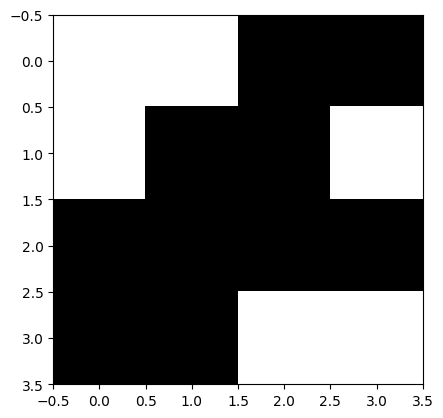

In [7]:
plt.imshow(sample_v[0].reshape(4, 4), cmap='gray')

In [8]:
def plot_image(
    sample, shape=(28, 28), grid_size=(10, 10), show_grid=False, randomize=True
):
    """Args:
    sample
    shape: (Default value = (28)
    28)
    grid_size: (Default value = (10)
    10)
    show_grid: (Default value = False)
    randomize: (Default value = True)
    """
    num_samples = grid_size[0] * grid_size[1]
    if randomize:
        id_sample = np.random.randint(0, sample.shape[0], num_samples)
    else:
        id_sample = np.arange(num_samples)

    # Create a display array with the appropriate size
    display = np.zeros((shape[0] * grid_size[0], shape[1] * grid_size[1]))

    for i, id_s in enumerate(id_sample):
        # Calculate the row and column for the grid
        idx = i // grid_size[1]  # Row index
        idy = i % grid_size[1]  # Column index

        # Ensure the sample can be reshaped to the specified shape
        display[
            (idx * shape[0]) : ((idx + 1) * shape[0]),
            (idy * shape[1]) : ((idy + 1) * shape[1]),
        ] = sample[id_s].reshape(
            shape
        )  # Directly reshape to shape

    # Plot the display image
    fig, ax = plt.subplots(1, 1)
    ax.imshow(display, cmap="gray")
    ax.axis("off")  # Hide axes

    if show_grid:
        # Minor ticks for the grid
        ax.set_xticks(np.arange(-0.5, grid_size[1] * shape[1], shape[1]), minor=True)
        ax.set_yticks(np.arange(-0.5, grid_size[0] * shape[0], shape[0]), minor=True)

        # Gridlines based on minor ticks
        ax.grid(which="minor", color="gray", linestyle="-", linewidth=2)

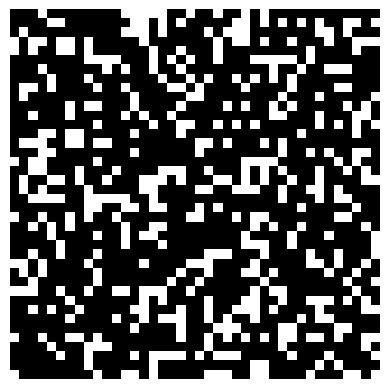

In [9]:
plot_image(sample=sample_v, shape=(4, 4), grid_size=(10, 10), show_grid=True)

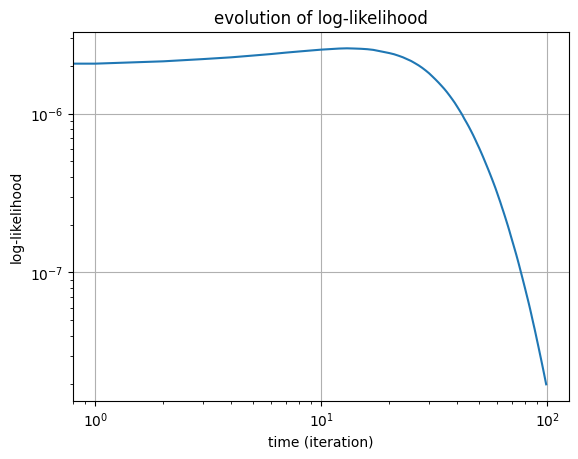

In [13]:
plt.plot(llh)
plt.xlabel("time (iteration)")
plt.ylabel("log-likelihood")
plt.title("evolution of log-likelihood")
plt.loglog()
plt.grid(True)